# dataframe_plotter demo
This notebook demonstrates the options available with dataframe_plotter

In [1]:
import numpy as np
import pandas as pd

from dataframe_plotter import dataframe_plotter
%matplotlib inline

### Make a DataFrame to play with

In [2]:
index = pd.date_range('2016-01-01', '2017-01-01', freq='H')
df = pd.DataFrame(np.arange(len(index)), index=index, columns=['linear'])

x = np.arange(len(df))
df['sin_year'] = np.sin(1 * 2 * np.pi * x / len(df))
df['sin_month'] = np.sin(12 * 2 * np.pi * x / len(df))
df['sin_day'] = np.sin(365 * 2 * np.pi * x / len(df))
df['cos_year'] = np.cos(1 * 2 * np.pi * x / len(df))
df['cos_month'] = np.cos(12 * 2 * np.pi * x / len(df))
df['cos_day'] = np.cos(365 * 2 * np.pi * x / len(df))
df['10sin_month'] = 10 * df['sin_month'] + df['sin_day']
df['10cos_month'] = 10 * df['cos_month'] + df['cos_day']
df.head()

,linear,sin_year,sin_month,sin_day,cos_year,cos_month,cos_day,10sin_month,10cos_month
2016-01-01 00:00:00,0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000
2016-01-01 01:00:00,1,0.000715,0.008583,0.258099,1.000000,0.999963,0.966118,0.343924,10.965750
2016-01-01 02:00:00,2,0.001430,0.017164,0.498709,0.999999,0.999853,0.866769,0.670353,10.865296
2016-01-01 03:00:00,3,0.002146,0.025745,0.705525,0.999998,0.999669,0.708685,0.962974,10.705371
2016-01-01 04:00:00,4,0.002861,0.034324,0.864532,0.999996,0.999411,0.502579,1.207768,10.496686


### No subplots

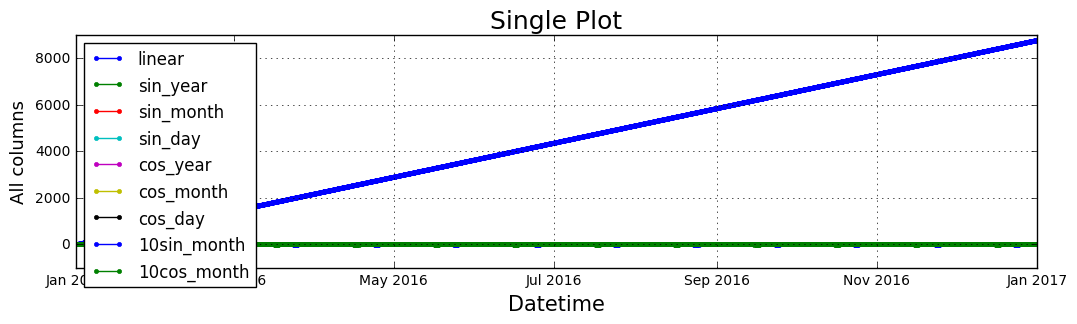

In [3]:
dataframe_plotter(df, title='Single Plot', ylabel='All columns', xlabel='Datetime')

### Suplots=True 
Mirrors the operation of `df.plot(subplots=True)` with the added ability to have titles for the individual subplots.

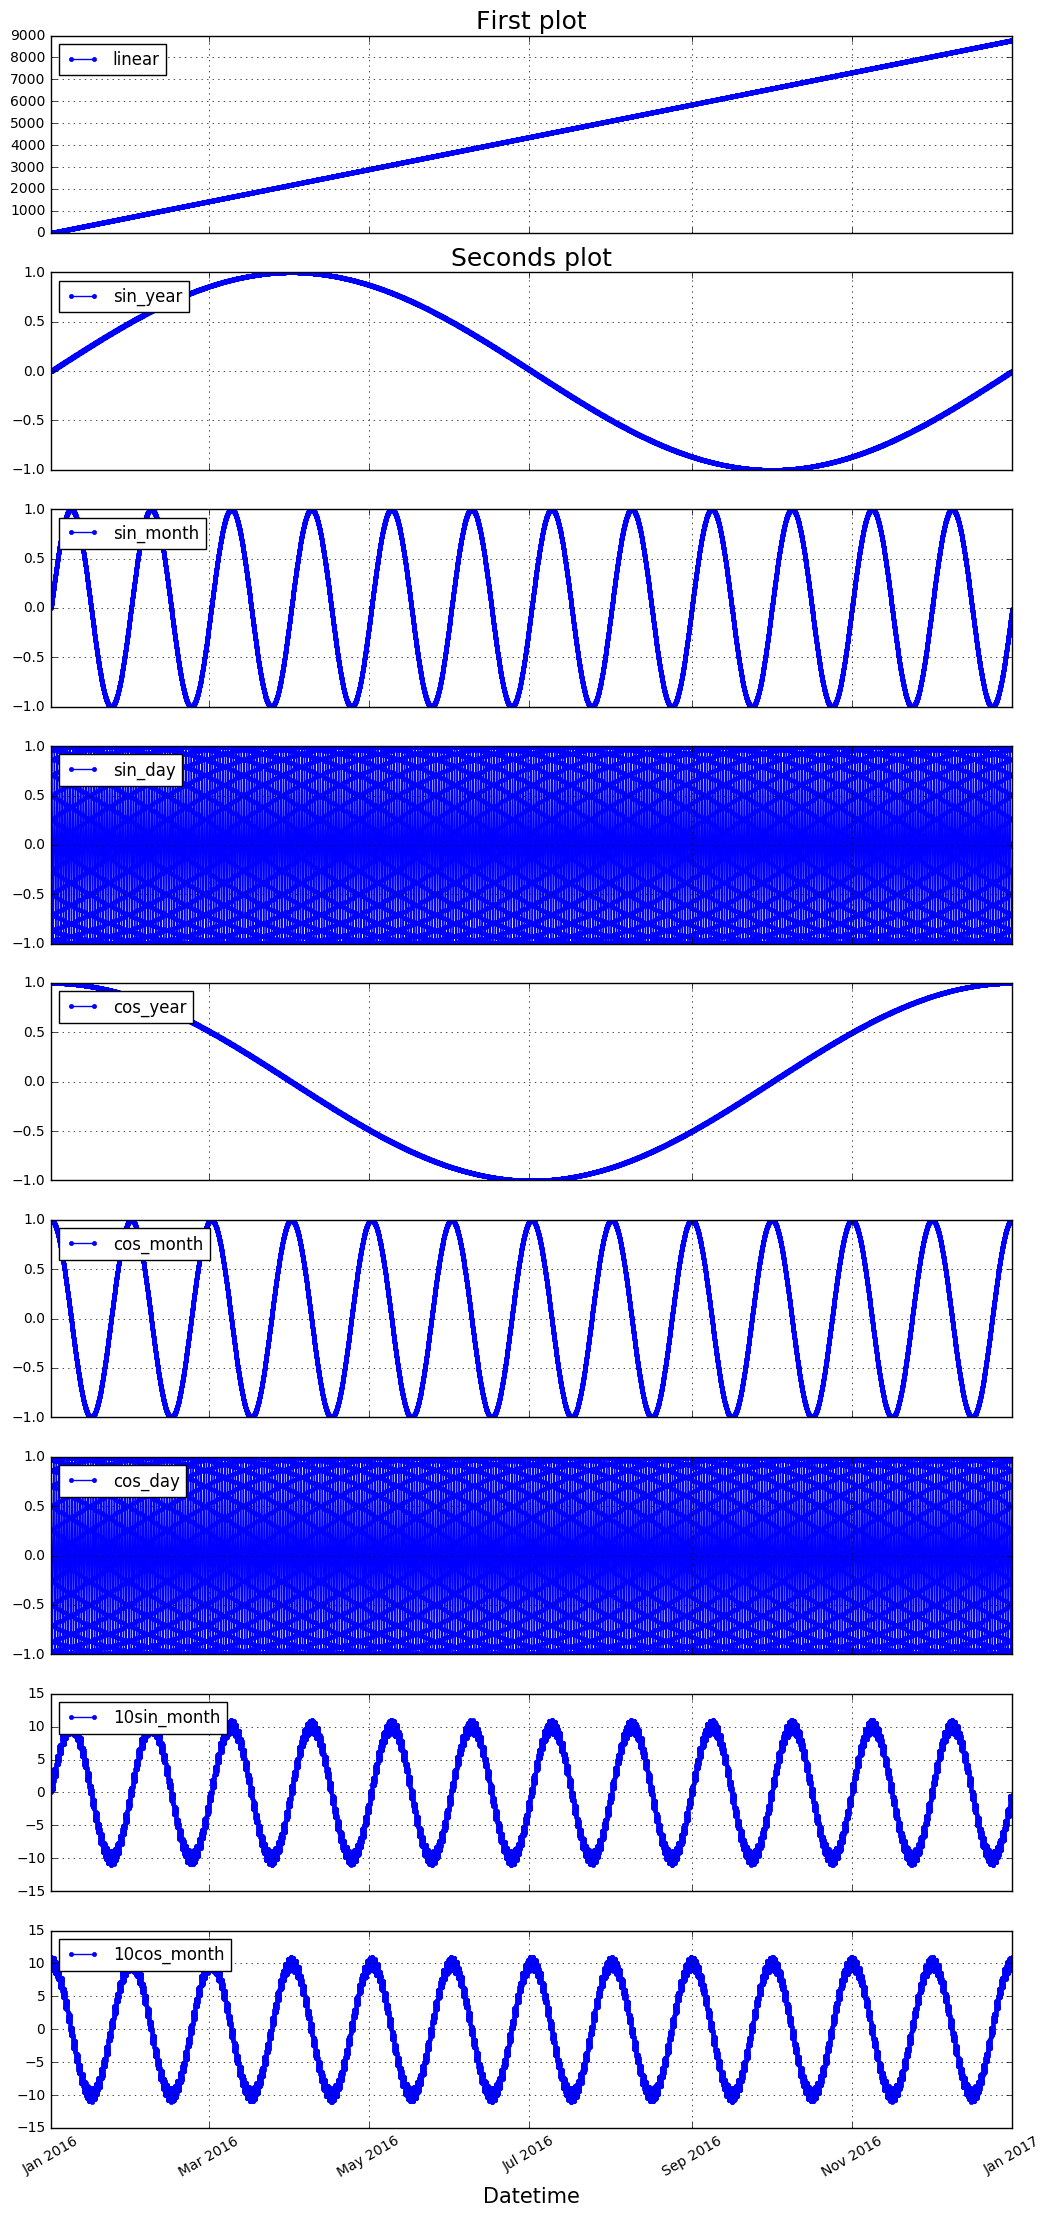

In [4]:
dataframe_plotter(df, subplots=True, title=['First plot', 'Seconds plot'], xlabel='Datetime',
                  x_label_rotation=30)

### Specify columns for the subplots

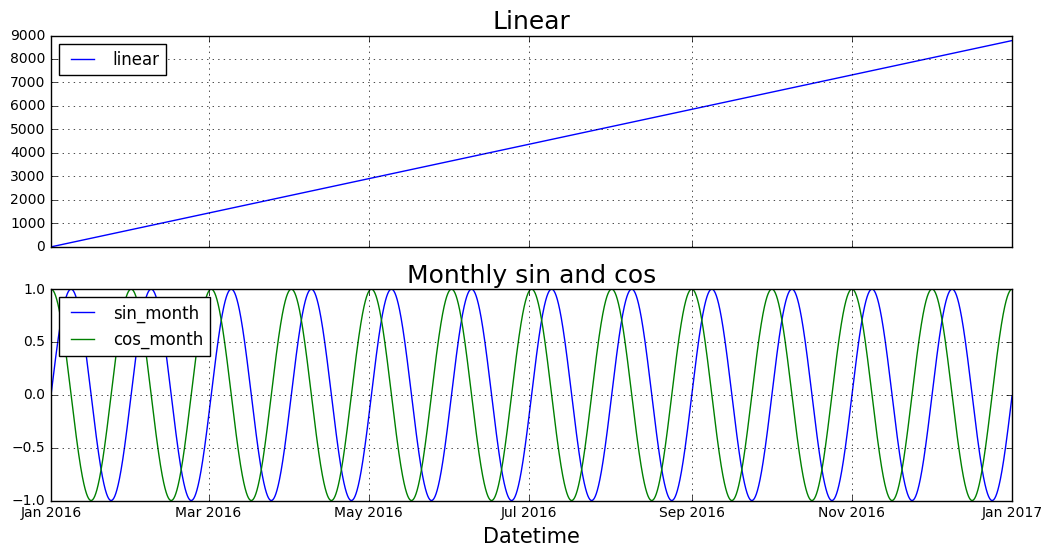

In [5]:
subplots = ['linear', ['sin_month', 'cos_month']]
title = ['Linear', 'Monthly sin and cos']
dataframe_plotter(df, subplots=subplots, title=title, xlabel='Datetime', dots=False)

### Secondary y axis

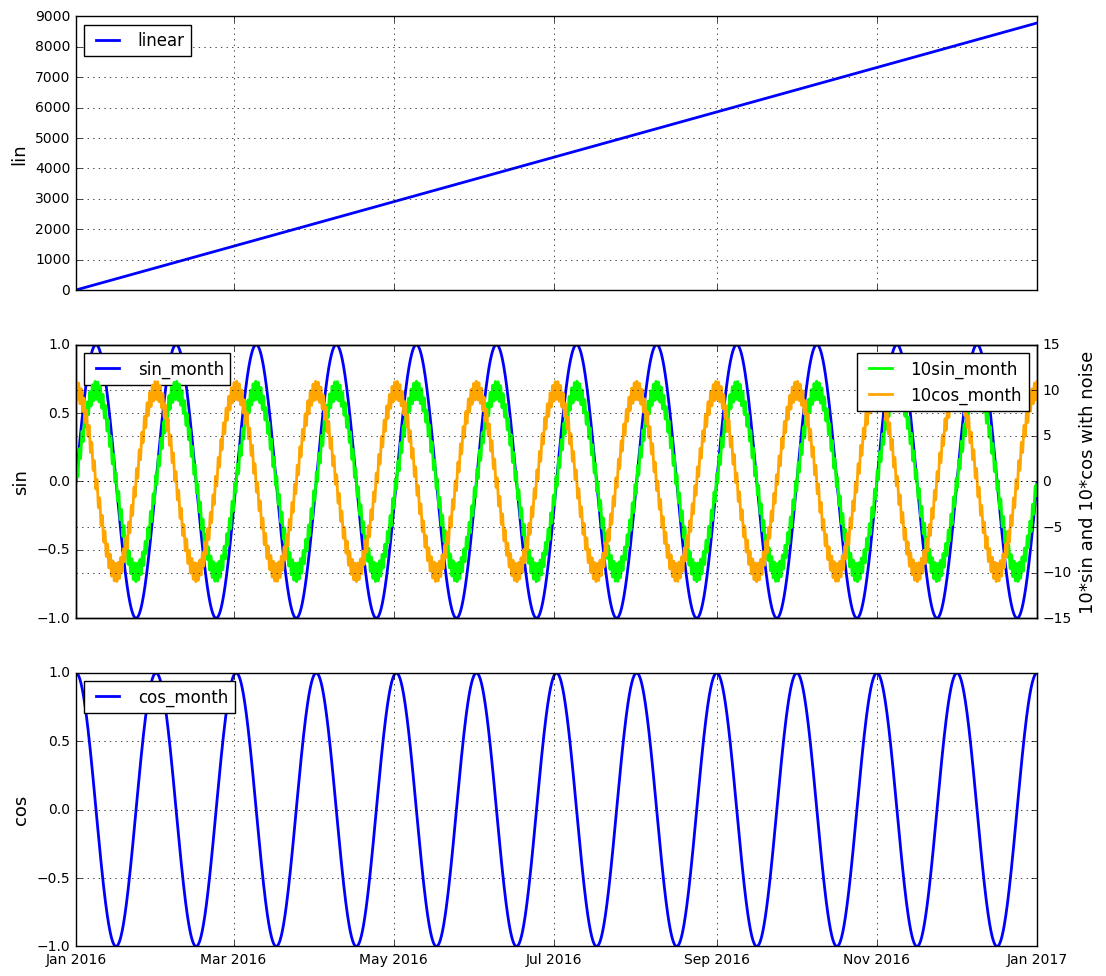

In [6]:
subplots = ['linear', 'sin_month', 'cos_month']
ylabel = ['lin', 'sin', 'cos']
secondary_y = ['', ['10sin_month', '10cos_month']]
secondary_y_label = ['', '10*sin and 10*cos with noise']
dataframe_plotter(df, subplots=subplots, ylabel=ylabel,
                  secondary_y=secondary_y, secondary_ylabel=secondary_y_label,
                  dots=False, linewidth=2, height_per_plot=4)

### Average value at each time of day

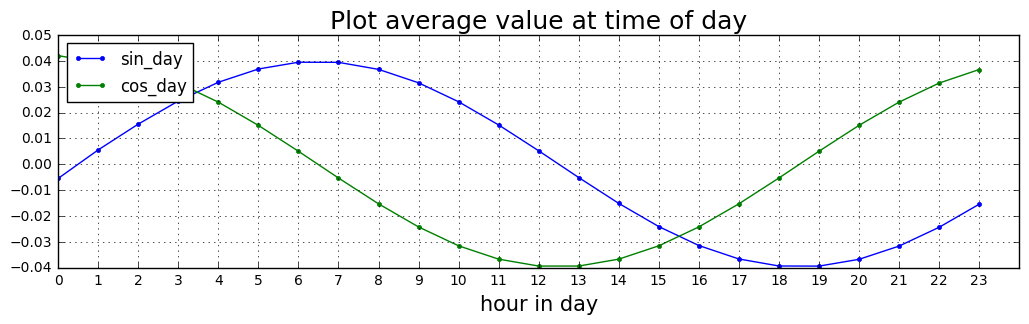

In [7]:
dataframe_plotter(df, plot_type='average', title='Plot average value at time of day',
                  subplots=[['sin_day', 'cos_day']], xlabel='hour in day')